In [1]:
from data_extraction import *
from visualize import *
from calculate_error import *
import matplotlib.pyplot as plt
import numpy as np

## Block Sample

In [2]:
# Get data corresponding to the block
gt, gt_df = get_ground_truth_data('data/test/Block_clear_joints.csv')
data, data_df = get_recorded_data('data/test/2024-07-24-test_20240724_113055.json', 6074, 53)

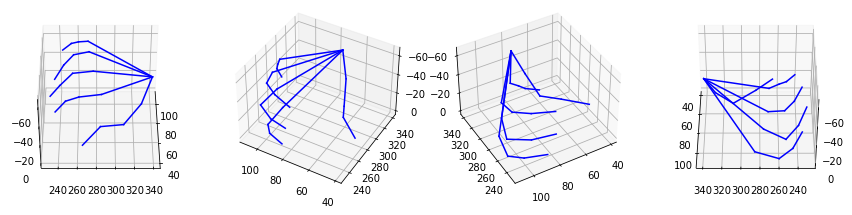

In [3]:
visualize_hand(gt[0])

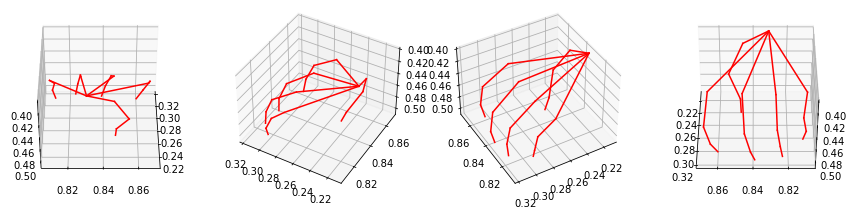

In [4]:
visualize_hand(data[0], 'r')

In [5]:
vis_gt = transform_data(gt, convert_to_mm=False)
vis_data = transform_data(data)

(53, 21, 3)
(53, 21, 3)


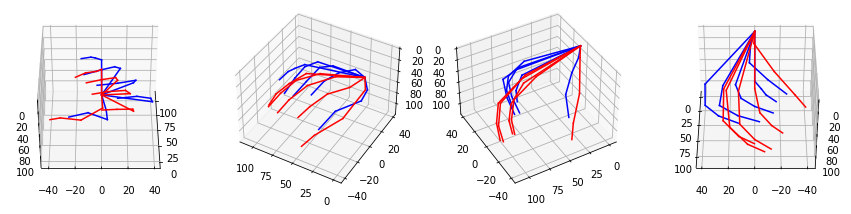

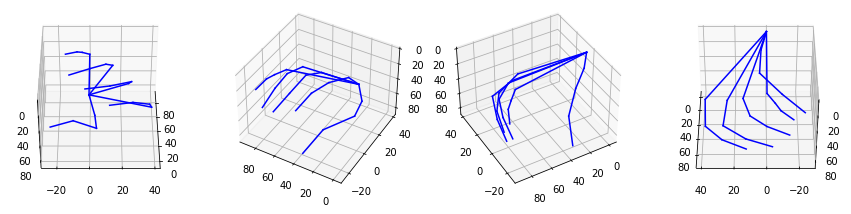

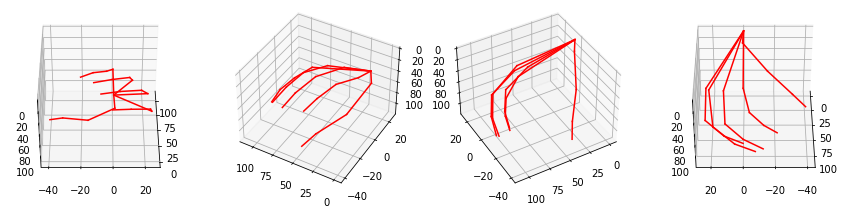

In [7]:
i = 0
visualize_hands([vis_gt[i], vis_data[i]])
visualize_hands([vis_gt[i]])
visualize_hands([vis_data[i]], styles=['r'])

max hand avg diff:	28.86
min hand avg diff:	9.29
avg hand avg diff:	16.38
overall max diff: 	108.6
overall min diff: 	0.02


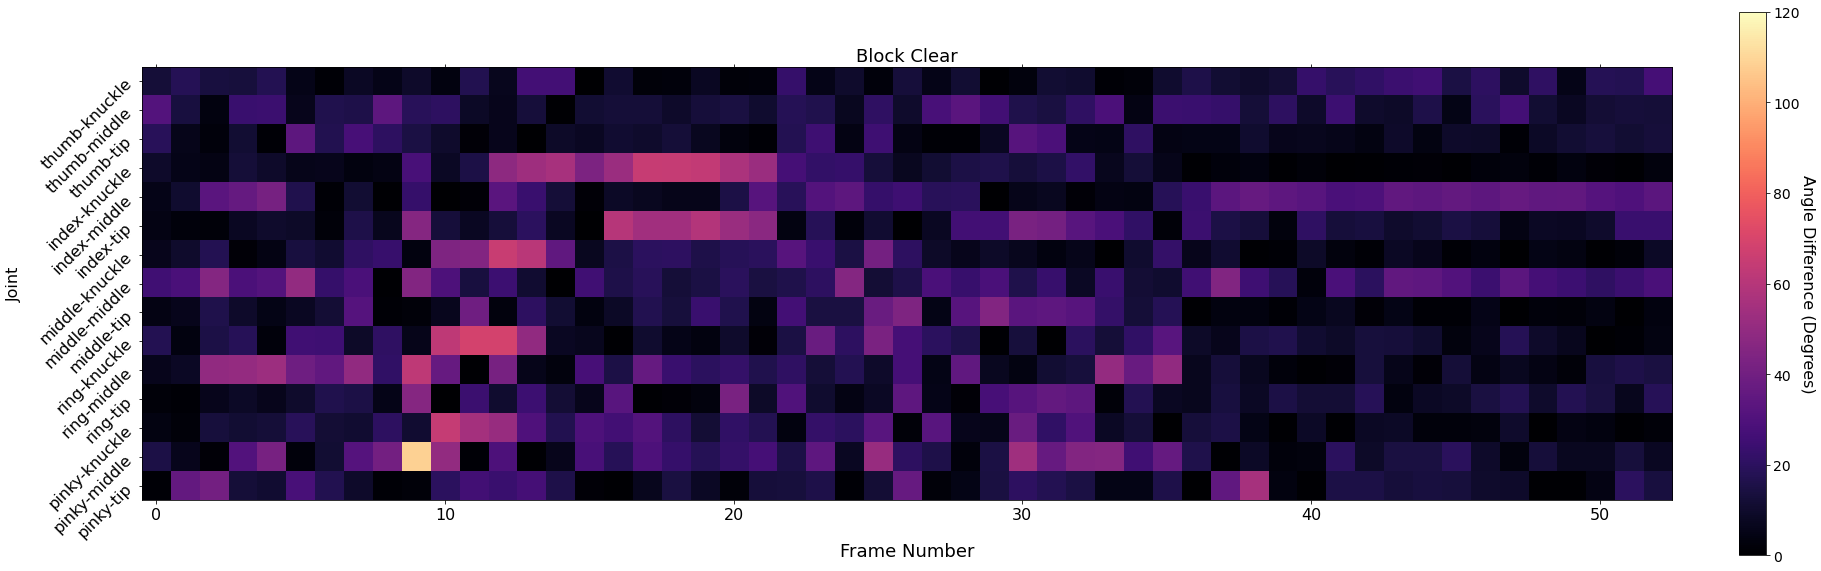

In [8]:
avg_diffs = []
angle_diffs = []
for i in range(len(gt)):
    avg_diffs.append(calculate_overall_hand_diff(gt[i], data[i])[0])
    angle_diffs.append(calculate_overall_hand_diff(gt[i], data[i])[1])
A = np.array(angle_diffs)

print(f"max hand avg diff:\t{round(max(avg_diffs), 2)}")
print(f"min hand avg diff:\t{round(min(avg_diffs), 2)}")
print(f"avg hand avg diff:\t{round(sum(avg_diffs)/len(avg_diffs), 2)}")
print(f"overall max diff: \t{round(A.max(), 2)}")
print(f"overall min diff: \t{round(A.min(), 2)}")

norm = mcolors.Normalize(vmin=0, vmax=120)
view_diff_matrix(A, "Block Clear", 'magma', norm)

## No object

In [9]:
# Get data corresponding to the block
gt, gt_df = get_ground_truth_data('data/test/No_object_joints.csv')
data, data_df = get_recorded_data('data/test/2024-07-24-test_20240724_113055.json', 6409, 46)

In [10]:
vis_gt = transform_data(gt, convert_to_mm=False)
vis_data = transform_data(data)

(46, 21, 3)
(46, 21, 3)


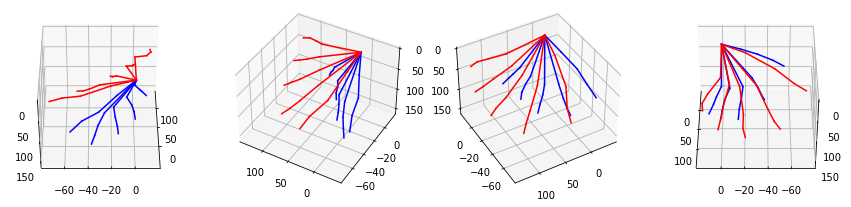

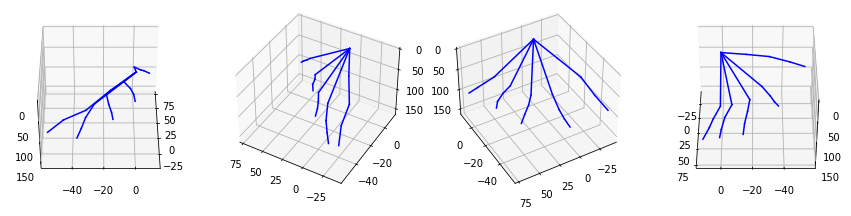

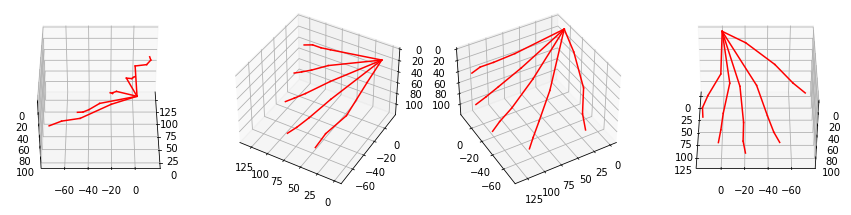

In [11]:
i = 0
visualize_hands([vis_gt[i], vis_data[i]])
visualize_hands([vis_gt[i]])
visualize_hands([vis_data[i]], styles=['r'])

max hand avg diff:	57.37
min hand avg diff:	3.89
avg hand avg diff:	11.49
overall max diff: 	128.42
overall min diff: 	0.0


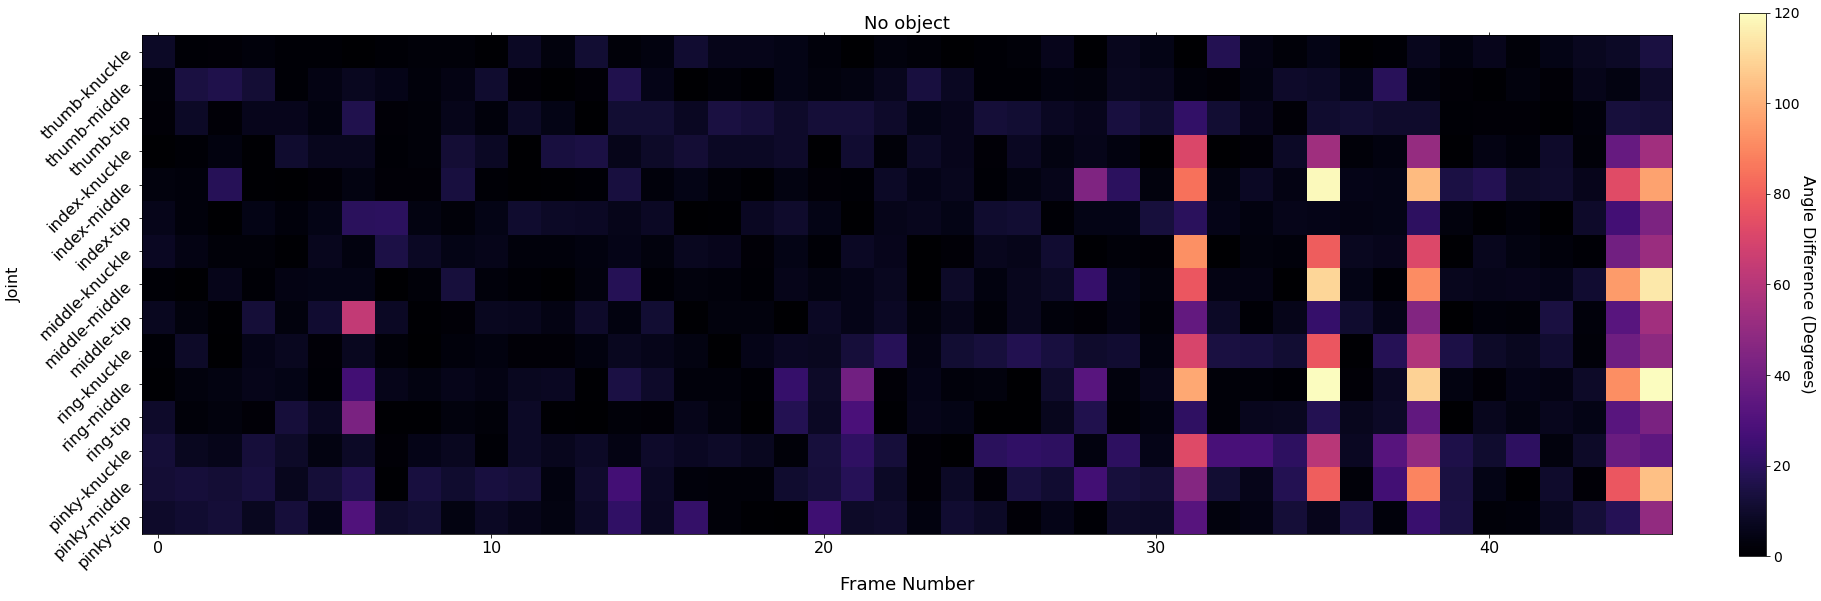

In [12]:
avg_diffs = []
angle_diffs = []
for i in range(len(gt)):
    avg_diffs.append(calculate_overall_hand_diff(gt[i], data[i])[0])
    angle_diffs.append(calculate_overall_hand_diff(gt[i], data[i])[1])
A = np.array(angle_diffs)

print(f"max hand avg diff:\t{round(max(avg_diffs), 2)}")
print(f"min hand avg diff:\t{round(min(avg_diffs), 2)}")
print(f"avg hand avg diff:\t{round(sum(avg_diffs)/len(avg_diffs), 2)}")
print(f"overall max diff: \t{round(A.max(), 2)}")
print(f"overall min diff: \t{round(A.min(), 2)}")

norm = mcolors.Normalize(vmin=0, vmax=120)
view_diff_matrix(A, "No object", 'magma', norm)

In [ ]:
i = 0
visualize_hands([vis_gt[i], vis_data[i]])
visualize_hands([vis_gt[i]])
visualize_hands([vis_data[i]], styles=['r'])

## Transform Points for Comparison

In [ ]:
def get_recorded_data_list(filename, start, n, sampling=3):
    with open(filename, "r") as file:
        data = json.load(file)

    data_list, inds, cols = __extract_json_data(data)

    df = pd.DataFrame(data_list, index=inds, columns=cols)
    return extract_points(df, start, n, sampling), df

In [ ]:
def __extract_json_data(data):
    inds = []
    data_list = []
    cols = []
    for key in data:
        if key == "handedness":
            pass
        elif key == "startTime":
            pass
        else:
            inds.append(int(key))
            hand_info = []
            for d in data[key]:
                hand_info.append(data[key][d])
            data_list.append(hand_info)
    for key in data[str(inds[0])]:
        cols.append(key)
    return data_list, inds, cols

In [ ]:
rot_gt2_hand0, nv_gt = rotate_hand(transformed_gt_arr, 35)
rot_data2_hand0, nv_data = rotate_hand(transformed_data2_arr, 45)
visualize_hands([rot_gt2_hand0,rot_data2_hand0])
visualize_hands([rot_gt2_hand0])
visualize_hands([rot_data2_hand0], styles=['r'])

In [ ]:
print(i)
rot_data2_hand0, nv_data = rotate_hand(transformed_data2_arr, i)
rot_gt2_hand0, nv_gt = rotate_hand(transformed_gt_arr, i)
visualize_hands([rot_gt2_hand0,rot_data2_hand0])
visualize_hands([rot_gt2_hand0])
visualize_hands([rot_data2_hand0], styles=['r'])
i += 5